<a href="https://colab.research.google.com/github/janmejaybhoi/NLU_Word_Embedding/blob/main/bert_albert_electra_elmo_glove_xlnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and Dependencies**

In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu  > /dev/null  

**Loading Models**

In [ ]:
import nlu
pipe = nlu.load('bert electra elmo glove xlnet albert pos')
pipe.predict('Do what you love')

small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
electra_small_uncased download started this may take some time.
Approximate size to download 48.7 MB
[OK!]
elmo download started this may take some time.
Approximate size to download 334.1 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
xlnet_base_cased download started this may take some time.
Approximate size to download 415.8 MB
[OK!]
albert_base_uncased download started this may take some time.
Approximate size to download 42.7 MB
[OK!]
pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]


,glove_embeddings,bert_embeddings,token,electra_embeddings,pos,albert_embeddings,elmo_embeddings,xlnet_embeddings
origin_index,,,,,,,,
0,"[-0.1704699993133545, 0.40369999408721924, 0.2...","[-1.68057382106781, 1.1433855295181274, -0.613...",Do,"[1.6459695100784302, -0.08049976825714111, -0....",VBP,"[0.32812952995300293, -0.9270491003990173, -0....","[0.6992505788803101, -0.3186401128768921, -0.2...","[-0.027485592290759087, -0.39221471548080444, ..."
0,"[-0.1518000066280365, 0.38409000635147095, 0.8...","[-1.8182796239852905, 0.3488816022872925, -1.5...",what,"[1.9482752084732056, -0.005657907575368881, -0...",WP,"[0.04599538445472717, -1.0812875032424927, 0.9...","[0.8853474855422974, 0.15108785033226013, 0.10...","[0.6165474653244019, -2.5531911849975586, -2.0..."
0,"[-0.4988600015640259, 0.7660199999809265, 0.89...","[-3.2963531017303467, 0.4476622939109802, -1.0...",you,"[0.28584837913513184, 0.43225568532943726, -0....",PRP,"[0.10591024160385132, 0.21579766273498535, 2.6...","[0.3644843101501465, -0.141536146402359, -0.06...","[0.293067067861557, 0.049694061279296875, -0.6..."
0,"[0.25975000858306885, 0.5583299994468689, 0.57...",None,love,None,VBP,"[0.39382538199424744, -0.49803051352500916, 0....","[-0.7348151206970215, -0.09645552933216095, -0...","[-4.020033836364746, -2.2760159969329834, 0.88..."


**Loading Dataset**

In [ ]:
import pandas as pd
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
# Load dataset to Pandas
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')
df

--2020-11-04 10:43:28--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.43.118
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.43.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  32.2MB/s    in 7.7s    

2020-11-04 10:43:37 (31.6 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


**Getting Embedding Of All the models**

In [ ]:
predictions = pipe.predict(df[['comment','label']].iloc[0:500], output_level='token')
predictions

,label,glove_embeddings,bert_embeddings,token,electra_embeddings,pos,albert_embeddings,elmo_embeddings,xlnet_embeddings,text
origin_index,,,,,,,,,,
0,0,"[-0.872219979763031, -0.24943000078201294, 1.0...","[-1.3535488843917847, 1.2997395992279053, -0.6...",NC,"[-0.08954276144504547, 0.2729721665382385, -0....",NNP,"[-0.7502232789993286, -0.2700745761394501, -0....","[0.4888951778411865, 0.02264561504125595, -0.4...","[0.6400730609893799, -0.27778854966163635, -0....",NC and NH.
0,0,"[-0.07195299863815308, 0.23127000033855438, 0....","[-1.1345281600952148, 0.8951002955436707, -0.9...",and,"[0.41725367307662964, 0.7089611887931824, 0.41...",CC,"[0.889356791973114, -0.9173175096511841, 0.306...","[-0.02477884292602539, -0.20155462622642517, -...","[0.7884323596954346, -1.5079097747802734, 0.67...",NC and NH.
0,0,"[-0.8070999979972839, 0.029627999290823936, 1....","[-1.658284068107605, 0.7519569993019104, -1.14...",NH,"[-0.3248295485973358, 0.46425294876098633, -0....",NNP,"[-1.3560717105865479, -0.22673530876636505, 0....","[0.010294198989868164, -0.7602927684783936, 0....","[-0.2549888491630554, -2.2768502235412598, 1.1...",NC and NH.
0,0,"[-0.3397899866104126, 0.20940999686717987, 0.4...",None,.,None,.,"[-0.3477928340435028, -0.18007326126098633, 0....","[-0.8871510028839111, -0.20039957761764526, -1...","[-0.8349902033805847, -0.4562772214412689, -0....",NC and NH.
1,0,"[-0.4988600015640259, 0.7660199999809265, 0.89...","[-0.8970238566398621, 0.9131066203117371, -0.4...",You,"[-0.2718363106250763, -0.3511123061180115, -0....",PRP,"[-0.49157485365867615, 0.7055115103721619, 1.8...","[0.61176598072052, -0.18037298321723938, -0.66...","[1.2179206609725952, -1.572461485862732, 0.313...",You do know west teams play against west teams...
...,...,...,...,...,...,...,...,...,...,...
499,0,"[-0.1440100073814392, 0.3255400061607361, 0.14...","[-0.5129379630088806, 1.3748126029968262, -0.8...",for,"[0.24508127570152283, -0.5268265604972839, 0.6...",IN,"[0.6374995708465576, 0.39954620599746704, -0.7...","[-0.2415028065443039, 0.05413343757390976, -0....","[0.12577177584171295, -2.9093310832977295, -1....",Hard drive requirements tend to include extra ...
499,0,"[-0.03819400072097778, -0.24487000703811646, 0...","[-0.397857666015625, 1.8641446828842163, -0.64...",the,"[-0.27525797486305237, 0.01061764545738697, 0....",DT,"[-1.0179435014724731, 0.9191027879714966, 1.71...","[-0.06904851645231247, 0.11261536926031113, 0....","[-0.8949751853942871, 0.23544716835021973, -0....",Hard drive requirements tend to include extra ...
499,0,"[-0.6050300002098083, 0.35631999373435974, 0.1...","[-0.44747045636177063, 0.8856216669082642, -0....",file,"[-0.0217195525765419, -0.4237499237060547, 0.2...",NN,"[-0.5016553401947021, -1.0222676992416382, 1.1...","[0.021550625562667847, 0.38065245747566223, -0...","[-1.0581018924713135, -1.4315071105957031, 0.4...",Hard drive requirements tend to include extra ...


**Prepare Data for T-SNE Visualization**

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

def get_tsne_df(predictions,embd_column, hue_column='label'):
  # cast column to np aray and generate TSNE embedding and store them into DF with labelr eady for hue plot
  # Some rows contain NONE text as result of preprocessing, thus we have some NA embeddings and drop them
  predictions.dropna(how='any', inplace=True)
  # We first create a column of type np array
  predictions['np_array'] = predictions[embd_column].apply(lambda x: np.array(x))
  # Make a matrix from the vectors in the np_array column via list comprehension
  mat = np.matrix([x for x in predictions.np_array])

  # Fit and transform T-SNE algorithm
  model = TSNE(n_components=2) #n_components means the lower dimension
  low_dim_data = model.fit_transform(mat)
  t_df = pd.DataFrame(low_dim_data, predictions[hue_column].replace({1:'sarcasm',0:'normal'}))
  t_df.columns = ['x','y']

  return t_df 

# HUED on sarcasm_labelS
t_bert_sarcasm = get_tsne_df(predictions,'bert_embeddings')
t_albert_sarcasm = get_tsne_df(predictions,'albert_embeddings')
t_electra_sarcasm = get_tsne_df(predictions,'electra_embeddings')
t_glove_sarcasm = get_tsne_df(predictions,'glove_embeddings')
t_elmo_sarcasm = get_tsne_df(predictions,'elmo_embeddings')
t_xlnet_sarcasm = get_tsne_df(predictions,'xlnet_embeddings')


# hue on POS
t_bert_pos = get_tsne_df(predictions,'bert_embeddings',hue_column='pos')
t_albert_pos = get_tsne_df(predictions,'albert_embeddings',hue_column='pos')
t_electra_pos = get_tsne_df(predictions,'electra_embeddings',hue_column='pos')
t_glove_pos = get_tsne_df(predictions,'glove_embeddings',hue_column='pos')
t_elmo_pos = get_tsne_df(predictions,'elmo_embeddings',hue_column='pos')
t_xlnet_pos = get_tsne_df(predictions,'xlnet_embeddings',hue_column='pos')

**Plotting styles**

In [ ]:
# set some styles for for Plotting
import seaborn as sns
# Style Plots a bit
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 14)

**Comparing Embedding wrt POS**

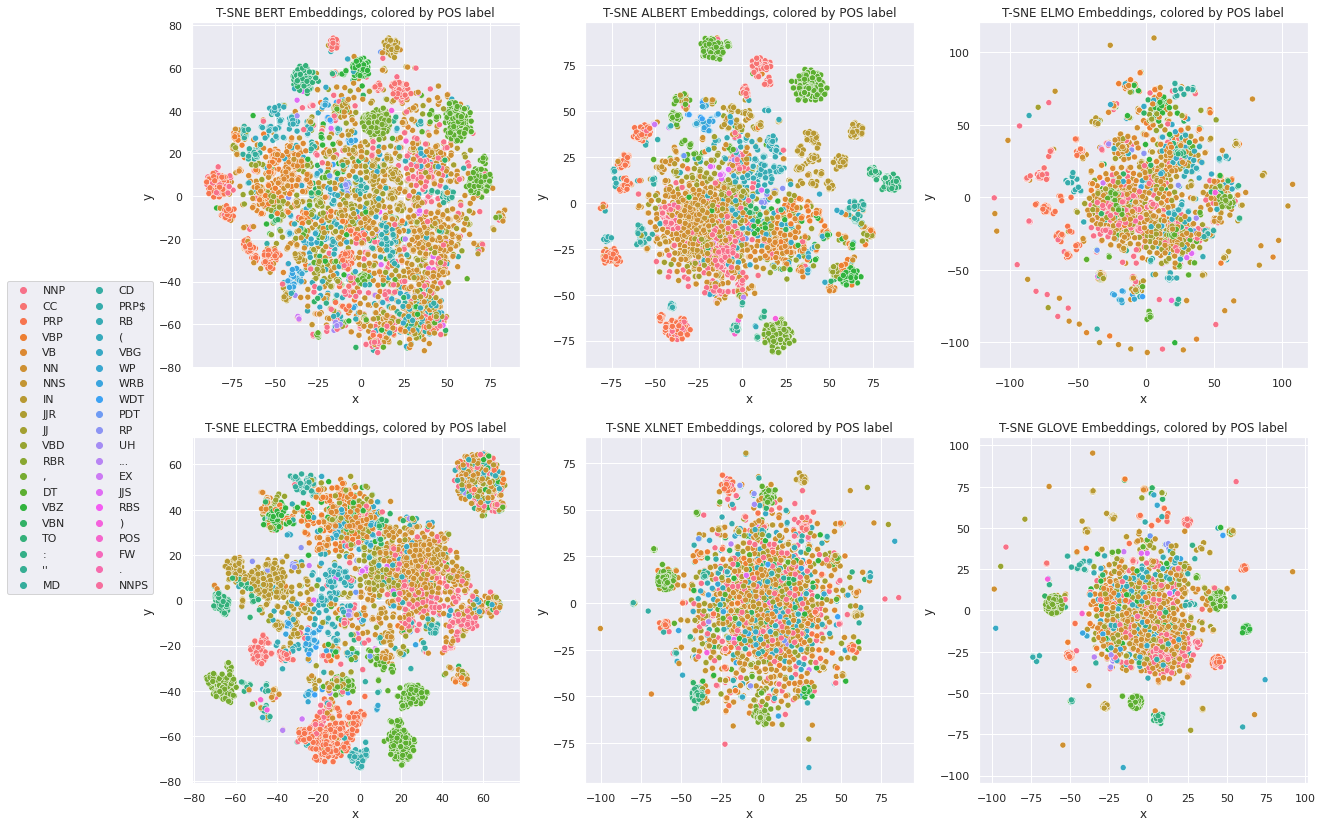

In [ ]:
# Plot multiple t-snes
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3,nrows=2)

ax = sns.scatterplot(data=t_bert_pos, x='x', y='y', hue=t_bert_pos.index, ax=axs[0][0])
ax.set_title('T-SNE BERT Embeddings, colored by POS label')
ax.get_legend().remove()

ax = sns.scatterplot(data=t_albert_pos, x='x', y='y', hue=t_albert_pos.index, ax=axs[0][1])
ax.set_title('T-SNE ALBERT Embeddings, colored by POS label')
ax.get_legend().remove()

ax = sns.scatterplot(data=t_elmo_pos, x='x', y='y', hue=t_elmo_pos.index, ax=axs[0][2])
ax.set_title('T-SNE ELMO Embeddings, colored by POS label')
ax.get_legend().remove()


ax = sns.scatterplot(data=t_electra_pos, x='x', y='y', hue=t_electra_pos.index, ax=axs[1][0])
ax.set_title('T-SNE ELECTRA Embeddings, colored by POS label')
ax.get_legend().remove()


ax = sns.scatterplot(data=t_xlnet_pos, x='x', y='y', hue=t_xlnet_pos.index, ax=axs[1][1])
ax.set_title('T-SNE XLNET Embeddings, colored by POS label')
ax.get_legend().remove()

ax = sns.scatterplot(data=t_glove_pos, x='x', y='y', hue=t_glove_pos.index, ax=axs[1][2])
ax.set_title('T-SNE GLOVE Embeddings, colored by POS label')
ax.legend(loc='center right', bbox_to_anchor=(-2.5, 1), ncol=2)


**Comparing Embedding wrt Sarcasm**

Text(0.5, 1.0, 'T-SNE GLOVE Embeddings, colored by Sarcasm label')

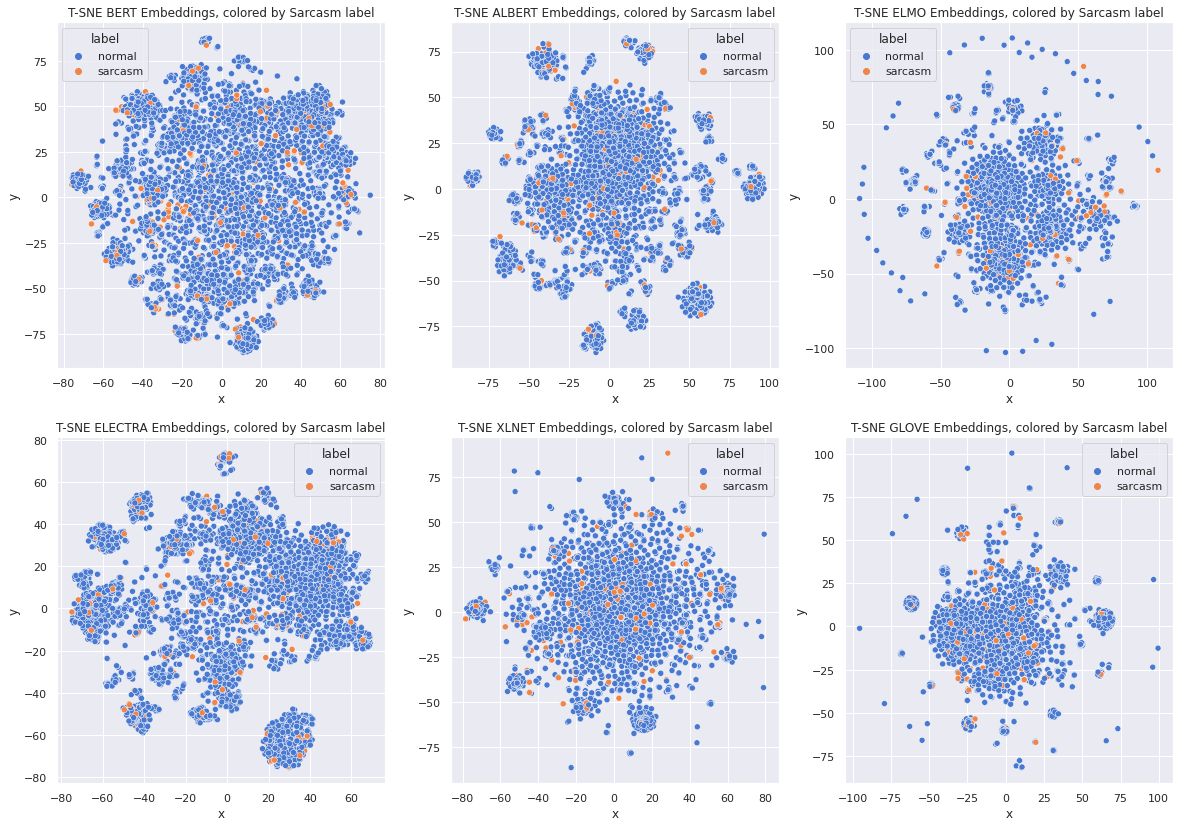

In [ ]:
# Plot multiple t-snes
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3,nrows=2)

ax = sns.scatterplot(data=t_bert_sarcasm, x='x', y='y', hue=t_bert_sarcasm.index, ax=axs[0][0])
ax.set_title('T-SNE BERT Embeddings, colored by Sarcasm label')

ax = sns.scatterplot(data=t_albert_sarcasm, x='x', y='y', hue=t_albert_sarcasm.index, ax=axs[0][1])
ax.set_title('T-SNE ALBERT Embeddings, colored by Sarcasm label')

ax = sns.scatterplot(data=t_elmo_sarcasm, x='x', y='y', hue=t_elmo_sarcasm.index, ax=axs[0][2])
ax.set_title('T-SNE ELMO Embeddings, colored by Sarcasm label')


ax = sns.scatterplot(data=t_electra_sarcasm, x='x', y='y', hue=t_electra_sarcasm.index, ax=axs[1][0])
ax.set_title('T-SNE ELECTRA Embeddings, colored by Sarcasm label')


ax = sns.scatterplot(data=t_xlnet_sarcasm, x='x', y='y', hue=t_xlnet_sarcasm.index, ax=axs[1][1])
ax.set_title('T-SNE XLNET Embeddings, colored by Sarcasm label')

ax = sns.scatterplot(data=t_glove_sarcasm, x='x', y='y', hue=t_glove_sarcasm.index, ax=axs[1][2])
ax.set_title('T-SNE GLOVE Embeddings, colored by Sarcasm label')